## Observations and Insights 

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [40]:
# Checking the number of mice.

mice_count = len(pd.unique(combined_mouse_data['Mouse ID']))
mice_count

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice_id = combined_mouse_data.loc[combined_mouse_data.duplicated(subset =['Mouse ID','Timepoint',]),'Mouse ID'].unique()


In [42]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate_mice_id=pd.DataFrame(duplicate_mice_id)
all_duplicate_mice_id

,0
0,g989


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mouse_df = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicate_mice_id)==False]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [44]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count = len(clean_mouse_df['Mouse ID'].value_counts())
cleaned_mice_count

248

## Summary Statistics

In [45]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean = clean_mouse_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean_mouse_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = clean_mouse_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std_Dev = clean_mouse_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = clean_mouse_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean
median
variance
std_Dev
sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [46]:
# Assemble the resulting series into a single summary dataframe.

summary_stats_df =pd.DataFrame({'mean':mean, 'median':median, 'variance':variance, 'Standard Deviation':std_Dev, 'SEM':sem})
summary_stats_df


,mean,median,variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_groupby= clean_mouse_df.groupby('Drug Regimen')
summary_stats_df2 =summary_stats_groupby.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_stats_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

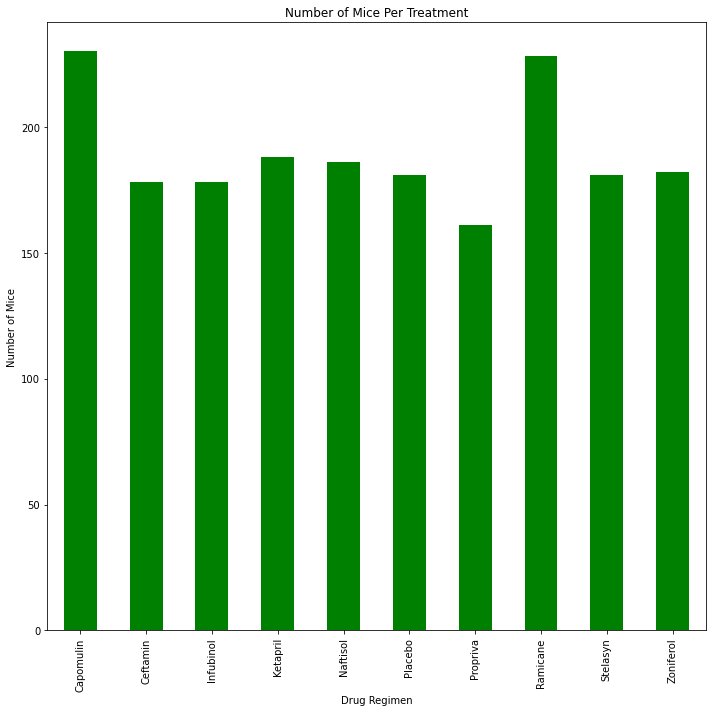

In [48]:
#### Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count_per_treatment = combined_mouse_data.groupby(['Drug Regimen']).count()['Mouse ID']

bar_plot =mice_count_per_treatment.plot.bar(figsize=(10,10), color ='g')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice Per Treatment")
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number Of Mice')

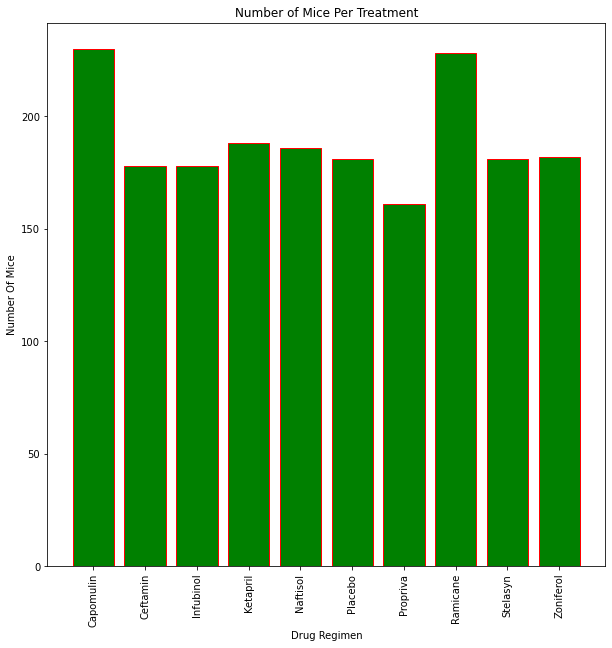

In [49]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# create a list to hold the number of mice
mice_ls= (combined_mouse_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

x_axis = np.arange(len(mice_count_per_treatment))
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.bar(x_axis, mice_ls, color='g', edgecolor ='r')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')
plt.title('Number of Mice Per Treatment')
plt.xlabel('Drug Regimen')
plt.ylabel('Number Of Mice')


In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#group the mice by gender 
mice_by_gender =  combined_mouse_data.groupby(['Mouse ID','Sex'])
mice_by_gender
mice_by_gender_df = pd.DataFrame(mice_by_gender.size())
mice_by_gender_df
mouse_gender = pd.DataFrame(mice_by_gender_df.groupby(['Sex']).count())
mouse_gender.columns = ['Total Count']
mouse_gender['Percentage of Sex'] = (mouse_gender['Total Count']/mouse_gender['Total Count'].sum())

In [51]:
# format the "Percentage of Sex" column
mouse_gender['Percentage of Sex'] = mouse_gender["Percentage of Sex"].map("{:,.2%}".format)
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.80%
Male,125,50.20%


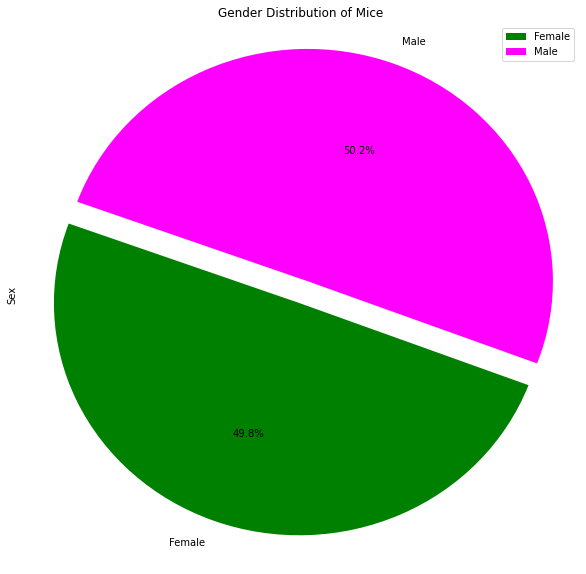

In [52]:
explode = (0.1, 0)
colors = ['green', 'magenta']
plot = mouse_gender.plot.pie(y='Total Count', figsize=(10,10), colors = colors, startangle=160, explode = explode, autopct="%1.1f%%")

plt.title('Gender Distribution of Mice')
plt.ylabel('Sex')
plt.axis('tight')
plt.show()

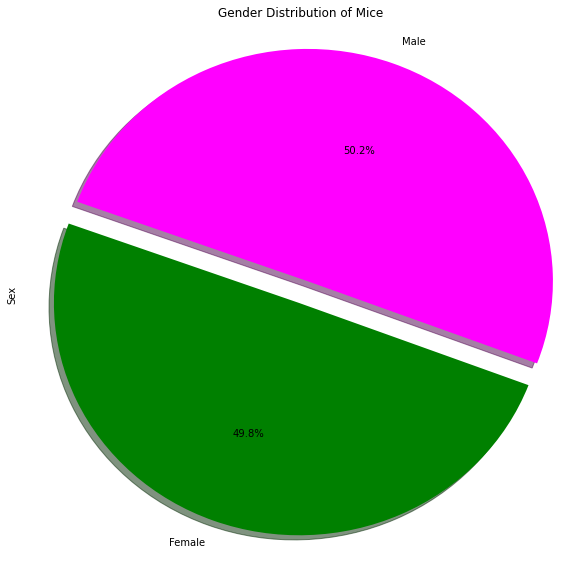

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Generate a pie plot showing the distribution of female versus male mice using pyplo

# Create Labels for the sections of the pie chart
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.80,50.20]

#Set colors
colors = ['green', 'magenta']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart 
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160,)
plt.title('Gender Distribution of Mice')
plt.ylabel('Sex')
#Set equal axis
plt.axis('tight')
plt.show()



## Quartiles, Outliers and Boxplots

In [54]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
final_timepoint= combined_mouse_data.groupby('Mouse ID').max()['Timepoint']
final_timepoint_df=pd.DataFrame(final_timepoint)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_mouse_study_df=pd.merge(final_timepoint_df, combined_mouse_data, on=('Mouse ID','Timepoint'))


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [55]:
 #Tumor volume for Capomulin
capomulin_df = merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen']=='Capomulin']
capomulin_tumorvolume=capomulin_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
capomulin_quartiles=capomulin_tumorvolume.quantile([.25,.75])
capomulinq1=capomulin_quartiles[.25]
capomulinq3=capomulin_quartiles[.75]
capomulinqIQR=capomulinq3-capomulinq1
capomulinLowerBound=capomulinq1-(capomulinqIQR*1.5)
capomulinUpperBound=capomulinq3+(capomulinqIQR*1.5)

#Summary STable
summary_capomulin_df= pd.DataFrame({
    "Capomulin Quartile 1":[capomulinq1],
    "Capomulin Quartile 3":[capomulinq3],
    "Capomulin IQR":[capomulinqIQR],
    "Capomulin Lower Bound":[capomulinLowerBound],
    "Capomulin Upper Bound":[capomulinUpperBound]
})
summary_capomulin_df

,Capomulin Quartile 1,Capomulin Quartile 3,Capomulin IQR,Capomulin Lower Bound,Capomulin Upper Bound
0,32.377357,40.15922,7.781863,20.704562,51.832015


In [56]:
#Tumor volume for Ramicane

ramicane_df = merged_mouse_study_df.loc[merged_mouse_study_df['Drug Regimen']=='Ramicane']
ramicane_tumorvolume=ramicane_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
ramicane_quartiles=ramicane_tumorvolume.quantile([.25,.75])
ramicaneq1=ramicane_quartiles[.25]
ramicaneq3=ramicane_quartiles[.75]
ramicaneIQR=ramicaneq3-ramicaneq1
ramicaneLowerBound=ramicaneq1-(ramicaneIQR*1.5)
#Summary Table
summary_ramicane_df= pd.DataFrame({
    "Ramicane Quartile 1":[ramicaneq1],
    "Ramicane Quartile 3":[ramicaneq3],
    "Ramicane IQR":[ramicaneIQR],
    "Ramicane Lower Bound":[ramicaneLowerBound] 
})
summary_ramicane_df



,Ramicane Quartile 1,Ramicane Quartile 3,Ramicane IQR,Ramicane Lower Bound
0,31.56047,40.659006,9.098537,17.912664


In [57]:
#Tumor volume for Infubinol
infubinol_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=="Infubinol"]
infubinol_tumorvolume=infubinol_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
infubinol_quartiles=infubinol_tumorvolume.quantile([.25,.75])
infubinolq1=infubinol_quartiles[.25]
infubinolq3=infubinol_quartiles[.75]
infubinolqIQR=infubinolq3-infubinolq1
infubinolLowerBound=infubinolq1-(infubinolqIQR*1.5)
infubinolUpperBound=infubinolq3+(infubinolqIQR*1.5)

#Summary Stats Table
summary_infubinol_df= pd.DataFrame({
    "Infubinol Quartile 1":[infubinolq1],
    "Infubinol Quartile 3":[infubinolq3],
    "Infubinol IQR":[infubinolqIQR],
    "Infubinol Lower Bound":[infubinolLowerBound],
    "Infubinol Upper Bound":[infubinolUpperBound]
})
summary_infubinol_df



,Infubinol Quartile 1,Infubinol Quartile 3,Infubinol IQR,Infubinol Lower Bound,Infubinol Upper Bound
0,54.048608,65.525743,11.477135,36.832905,82.741446


In [58]:
#Get just tumor volume for Ceftamin ceftamin
ceftamin_df = merged_mouse_study_df.loc[merged_mouse_study_df["Drug Regimen"]=='Ceftamin']
ceftamin_tumorvolume=ceftamin_df['Tumor Volume (mm3)']

#Calculate quartiles, IQR & Boundaries
ceftamin_quartiles=ceftamin_tumorvolume.quantile([.25,.75])
ceftaminq1=ceftamin_quartiles[.25]
ceftaminq3=ceftamin_quartiles[.75]
ceftaminqIQR=ceftaminq3-ceftaminq1
ceftaminLowerBound=ceftaminq1-(ceftaminqIQR*1.5)
ceftaminlUpperBound=ceftaminq3+(ceftaminqIQR*1.5)

#Summary Stats Table
summary_ceftamin_df= pd.DataFrame({
    "ceftamin Quartile 1":[ceftaminq1],
    "ceftamin Quartile 3":[ceftaminq3],
    "ceftamin IQR":[ceftaminqIQR],
    "ceftamin Lower Bound":[ceftaminLowerBound],
    "ceftamin Upper Bound":[ceftaminlUpperBound]
})
summary_ceftamin_df


,ceftamin Quartile 1,ceftamin Quartile 3,ceftamin IQR,ceftamin Lower Bound,ceftamin Upper Bound
0,48.722078,64.29983,15.577752,25.35545,87.666458


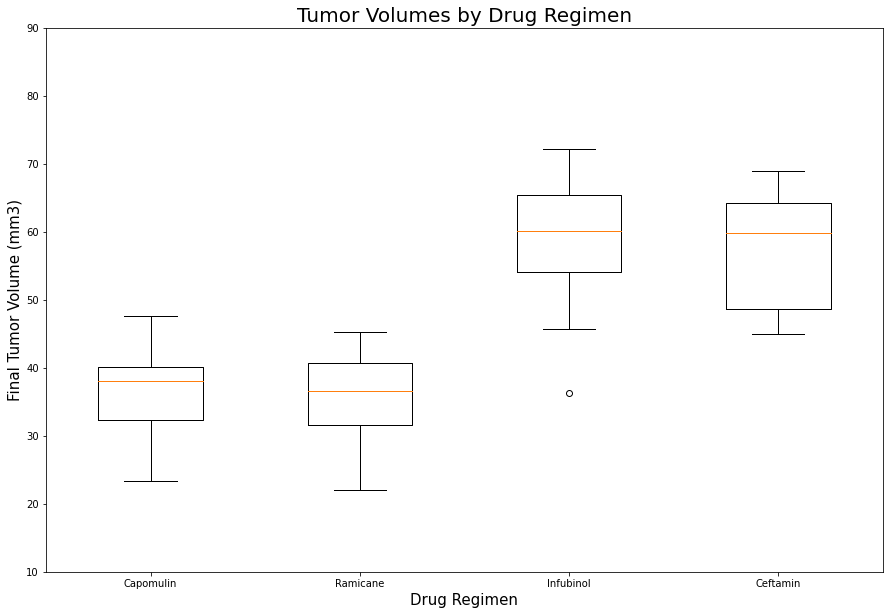

In [82]:
# # Generate a box plot of the final tumor volume of each mouse across four regimens of interest


regimen_plots = [capomulin_tumorvolume,ramicane_tumorvolume,infubinol_tumorvolume,ceftamin_tumorvolume]
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volumes by Drug Regimen', fontsize = 20)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 15)
ax1.set_xlabel('Drug Regimen', fontsize = 15)
ax1.boxplot(regimen_plots, labels=regimens, widths = 0.5,vert=True)
plt.ylim(10, 90)
plt.show()


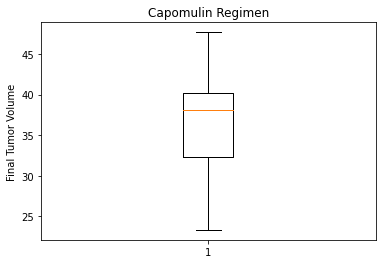

In [61]:
 fig1, ax1 = plt.subplots()
ax1.set_title('Capomulin Regimen')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(capomulin_tumorvolume)
plt.show()

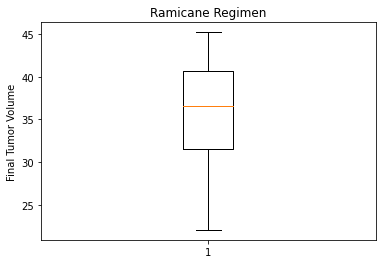

In [62]:
fig2, ax2 = plt.subplots()
ax2.set_title('Ramicane Regimen')
ax2.set_ylabel('Final Tumor Volume')
ax2.boxplot(ramicane_tumorvolume)
plt.show()

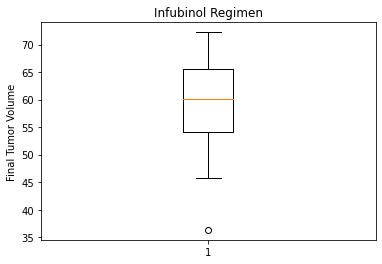

In [63]:
fig3, ax3 = plt.subplots()
ax3.set_title('Infubinol Regimen')
ax3.set_ylabel('Final Tumor Volume')
ax3.boxplot(infubinol_tumorvolume)
plt.show()

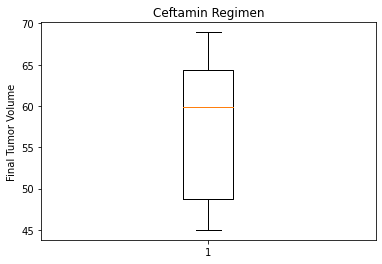

In [64]:
 fig4, ax4 = plt.subplots()
ax4.set_title('Ceftamin Regimen')
ax4.set_ylabel('Final Tumor Volume')
ax4.boxplot(ceftamin_tumorvolume)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Mouse u364 Tumor over time on Capomulin Regimen')

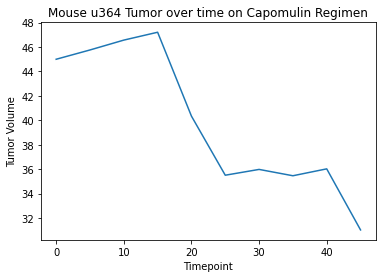

In [70]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#mouse of choice u364

mouseu364_df = combined_mouse_data.loc[combined_mouse_data['Mouse ID']=='u364']
timepoint=mouseu364_df['Timepoint']
u364tumorvolume=mouseu364_df['Tumor Volume (mm3)']

plt.plot(timepoint, u364tumorvolume, label="tumor volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Mouse u364 Tumor over time on Capomulin Regimen')


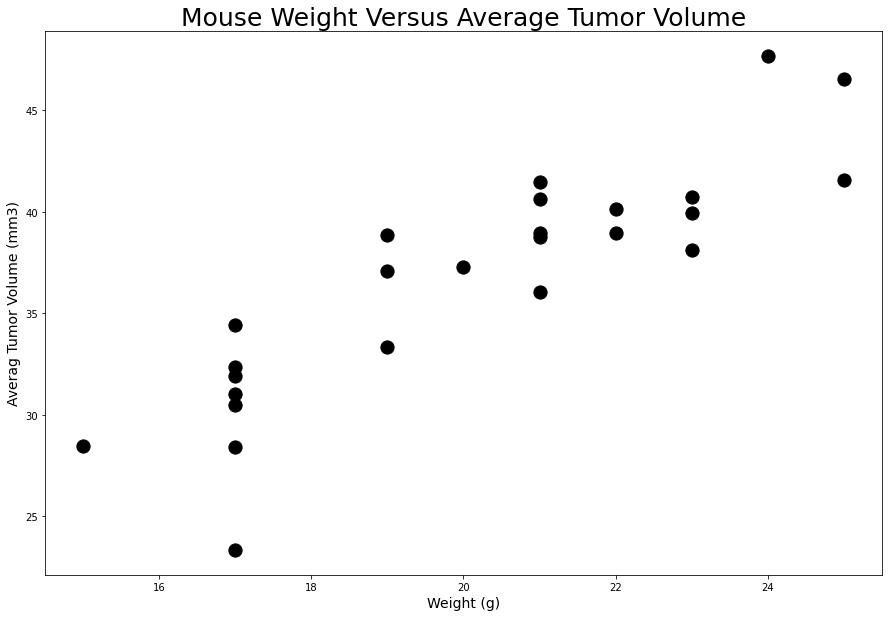

In [72]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_cap_vol =capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'],s=175, color="black")
plt.title('Mouse Weight Versus Average Tumor Volume',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()



## Correlation and Regression

In [67]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg_cap_vol['Weight (g)'],avg_cap_vol['Tumor Volume (mm3)'])[0],2)
correlation

0.88

In [69]:
x_values = avg_cap_vol['Weight (g)']
y_values = avg_cap_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_equation)

slope:1.750468228958504
intercept:1.4481469525549002
rvalue (Correlation coefficient):0.8767060403658119
pandas (Correlation coefficient):0.88
stderr:0.20026513236453639
y = 1.75x + 1.45


The r-squared is: 0.7686134812139006


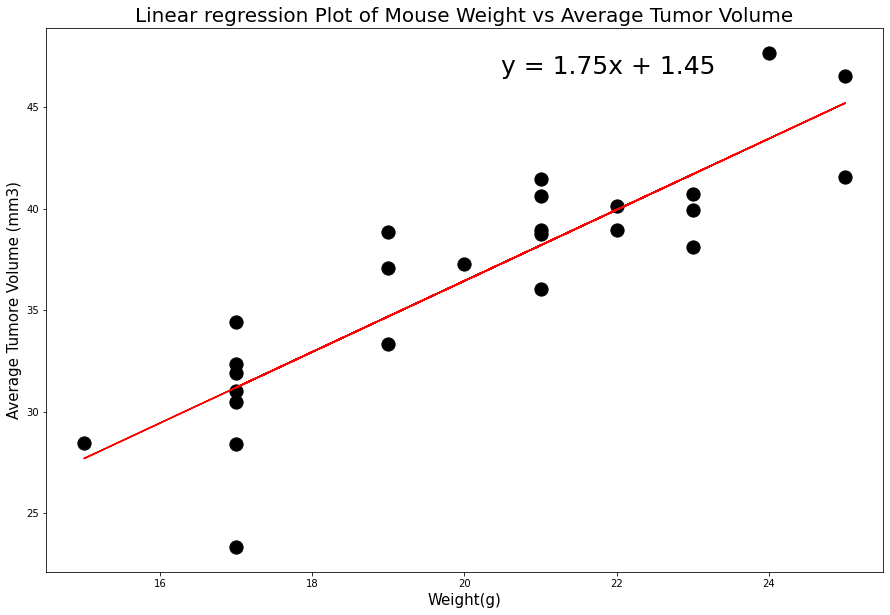

In [79]:
#linear regression and line plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="black")
plt.plot(x_values,regress_values,"r-")
plt.title('Linear regression Plot of Mouse Weight vs Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =15)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =15)
ax1.annotate(line_equation, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=25,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()